# 0. Import Library

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings

sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

# 2. Data Preprocessing

In [45]:
df = pd.read_csv('data/FT1000_v0.csv')
df.head()

,Rank,Name,in 2021 ranking,in 2020 ranking,Country,Sector,Absolute Growth Rate %,Compound Annual Growth Rate (CAGR) %,Revenue 2020 (€),Revenue 2017 (€),...,Unnamed: 990,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999
0,1.0,Swappie,No,No,Finland,Technology,19152.82,477.43,97611814.0,507000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Kilo Health,No,No,Lithuania,Health,16541.73,450.05,57318766.0,344428.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,OCI,No,No,UK,Financial Services,13133.13,409.59,568322073.0,4325512.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,OnlyFans,No,No,UK,Technology,11928.05,393.63,316732986.0,2652185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Enpal,No,No,Germany,Energy,11441.27,386.88,56109613.0,486165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
(df.keys().str[:7] == 'Unnamed').sum()

987

In [47]:
(df.iloc[:, 13:].isnull().sum() == 1001).sum()

987

Trước khi tiến hành các thao tác tiền xử lí chính, nhóm nhận thấy data thu thập được có các cột Unnamed chứa toàn các dữ liệu NaN, do đó nhóm sẽ loại bỏ các cột này

In [48]:
df.drop(df.iloc[:, 13:], axis = 1, inplace = True)

## 2.1. Tổng quan dữ liệu
Số cột và số dòng của dữ liệu

In [49]:
df.shape

(1001, 13)

Ý nghĩa của từng cột:
- `Rank`: thứ hạng của công ty
- `Name`: tên công ty
- `in 2021 ranking`: Công ty có nằm trong bảng xếp hạng năm 2021 hay không
- `in 2020 ranking`: Công ty có nằm trong bảng xếp hạng năm 2020 hay không
- `Country`: công ty thuộc về quốc gia nào
- `Sector`: lĩnh vực hoạt động của công ty
- `Absolute Growth Rate %`: Tỉ lệ tăng trưởng tuyệt đối từ 2017 tới 2020
- `Compound Annual Growth Rate (CAGR) %`: Tỉ lệ tăng trưởng kép từ 2017 tới 2020
- `Revenue 2020 (€)`: Doanh thu năm 2020 tính theo đồng Euro
- `Revenue 2017 (€)`: Doanh thu năm 2017 tính theo đồng Euro
- `Number of employees 2020`: Số lượng nhân viên năm 2020
- `Number of employees 2017`: Số lượng nhân viên năm 2017
- `Founding Year`: Năm công ty thành lập

Công thức tính 2 cột `Absolute Growth Rate %` và `Compound Annual Growth Rate (CAGR) %` đã được đề cập ở notebook `Data Collecting`, ở đây nhóm chỉ giải thích sự khác nhau về mặt ý nghĩa của 2 cột. 2 thang đo này thường được dùng để đánh giá kết quả đầu tư, trong trường hợp của dữ liệu này, là sự tăng trưởng của các công ty
- <t style = "color:green">Absolute Growth Rate</t> hay <t style = "color:green">tỉ lệ tăng trưởng tuyệt đối</t>, đo độ tăng trưởng của công ty trong một giai đoạn thời gian
- <t style = "color:blue">Compound Annual Growth Rate (CAGR)</t> hay <t style = "color:blue">tỉ lệ tăng trưởng kép</t>, đo độ tăng trưởng của công ty trong từng năm trong một giai đoạn thời gian. <t style = "color:blue">Tỉ lệ tăng trưởng kép</t> được tính dựa trên sự tái đầu tư của doanh thu mỗi năm, cho thấy tốc độ tăng trưởng của công ty trong từng năm. Còn <t style = "color:green">tỉ lệ tăng trưởng tuyệt đối</t> chỉ cho thấy sự tăng trưởng của công ty trong cả quá trình.

## 2.2. Data types
Kiểm tra kiểu dữ liệu của các cột

In [50]:
def open_object_dtype(s):
    dtypes = set(s.apply(lambda item : type(item)))
    return dtypes

df.apply(open_object_dtype)

Rank                                                   {<class 'float'>}
Name                                    {<class 'str'>, <class 'float'>}
in 2021 ranking                         {<class 'str'>, <class 'float'>}
in 2020 ranking                         {<class 'str'>, <class 'float'>}
Country                                 {<class 'str'>, <class 'float'>}
Sector                                  {<class 'str'>, <class 'float'>}
Absolute Growth Rate %                                 {<class 'float'>}
Compound Annual Growth Rate (CAGR) %                   {<class 'float'>}
Revenue 2020 (€)                                       {<class 'float'>}
Revenue 2017 (€)                                       {<class 'float'>}
Number of employees 2020                               {<class 'float'>}
Number of employees 2017                {<class 'str'>, <class 'float'>}
Founding Year                                          {<class 'float'>}
dtype: object

Quan sát kiểu dữ liệu của các cột, nhóm có nhận xét như sau:
- Các cột có kiểu dữ liệu hợp lí:
    - Numerical: `Absolute Growth Rate (%)` và `Compound Annual Growth Rate (CAGR) %`
    - Categorical: `Name, in 2021 ranking, in 2020 ranking, Country, Sector`
- Các cột dữ liệu float cần chuyển sang int: `Rank, Revenue 2020 (€), Revenue 2017 (€), Number of employees 2020, Founding Year`
- Cột có kiểu dữ liệu không rõ ràng: `Number of employees 2017`, gồm str và float. Vì ý nghĩa của cột này là số lượng nhân viên của công ty trong năm 2017, (tương tự cột `Number of employees 2020`), nhóm sẽ chuyển cột này thành int

Tuy nhiên việc chuyển kiểu dữ liệu sẽ được thực hiện cùng với việc loại bỏ missing values bên dưới

## 2.3. Missing values
Kiểm tra missing values trên tất cả các cột

In [51]:
df.isnull().sum()

Rank                                    1
Name                                    1
in 2021 ranking                         1
in 2020 ranking                         1
Country                                 1
Sector                                  1
Absolute Growth Rate %                  1
Compound Annual Growth Rate (CAGR) %    1
Revenue 2020 (€)                        1
Revenue 2017 (€)                        1
Number of employees 2020                5
Number of employees 2017                4
Founding Year                           1
dtype: int64

In [52]:
df.iloc[1000,:]

Rank                                    NaN
Name                                    NaN
in 2021 ranking                         NaN
in 2020 ranking                         NaN
Country                                 NaN
Sector                                  NaN
Absolute Growth Rate %                  NaN
Compound Annual Growth Rate (CAGR) %    NaN
Revenue 2020 (€)                        NaN
Revenue 2017 (€)                        NaN
Number of employees 2020                NaN
Number of employees 2017                NaN
Founding Year                           NaN
Name: 1000, dtype: object

In [53]:
df.drop(1000, axis = 0, inplace = True)

Đa số các cột có 1 giá trị NaN, để ý thấy hàng có index 1000 của df chứa toàn các giá trị NaN, nhóm quyết định drop hàng này. Do đó chỉ còn 2 cột có một vài giá trị khuyết đó là `Number of employees 2020` và `Number of employees 2017`

In [54]:
df[df.isnull().any(axis = 1)]

,Rank,Name,in 2021 ranking,in 2020 ranking,Country,Sector,Absolute Growth Rate %,Compound Annual Growth Rate (CAGR) %,Revenue 2020 (€),Revenue 2017 (€),Number of employees 2020,Number of employees 2017,Founding Year
199,200.0,Lyonnaise de Construction et Renovation,No,No,France,Construction,717.46,101.44,6640842.0,812371.0,NaN,NaN,2015.0
365,366.0,Labevolution,No,No,Italy,Health,438.38,75.27,7264130.0,1349250.0,NaN,5,2009.0
792,793.0,Spedition Ibov,No,No,Germany,Transport,200.43,44.29,3424863.0,1140000.0,NaN,NaN,2013.0
891,892.0,Accolade,No,Yes,Czech Republic,Property,174.26,39.98,83981636.0,31477723.0,NaN,NaN,2010.0


<AxesSubplot: >

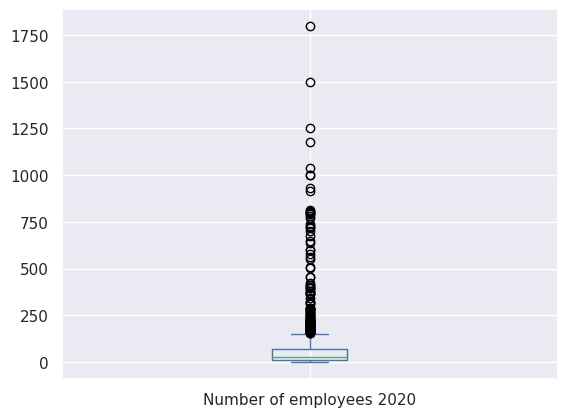

In [55]:
df['Number of employees 2020'].plot(kind = 'box')

Quan sát thấy phân bố của cột `Number of employees 2020` bị skew quá lớn, do đó nhóm quyết định sử dụng giá trị trung vị của cột này để điền vào các giá trị khuyết

In [56]:
df['Number of employees 2020'].fillna(df['Number of employees 2020'].median(), inplace = True)

Với trường hợp của cột `Number of employees 2020`, ta thấy cột này có cả kiểu dữ liệu str, trước khi tiến hành xử lí các missing value, ta sẽ đi tìm hiểu các dòng chứa str trong cột này

In [57]:
df[[isinstance(value, str) for value in df['Number of employees 2017']]]['Number of employees 2017']

0        1
1       10
2        4
3        4
4        9
      ... 
995     15
996     41
997    100
998     13
999      5
Name: Number of employees 2017, Length: 997, dtype: object

In [58]:
(df['Number of employees 2017'] == 'na').sum()

2

Cột này ngoài chứa các giá trị số ở dạng str còn chứa str `'na'`, ta thay các giá trị này bằng `np.nan`

In [59]:
df.replace('na', np.nan, inplace = True)

In [60]:
df['Number of employees 2017'] = df['Number of employees 2017'].astype(float)
df['Number of employees 2017'].fillna(df['Number of employees 2017'].median(), inplace = True)

In [61]:
df.isnull().sum()

Rank                                    0
Name                                    0
in 2021 ranking                         0
in 2020 ranking                         0
Country                                 0
Sector                                  0
Absolute Growth Rate %                  0
Compound Annual Growth Rate (CAGR) %    0
Revenue 2020 (€)                        0
Revenue 2017 (€)                        0
Number of employees 2020                0
Number of employees 2017                0
Founding Year                           0
dtype: int64

Sau khi đã xử lí hết các missing value, ta chuyển đổi kiểu dữ liệu của các cột cho phù hợp

In [62]:
df.iloc[:, [0, 8, 9, 10, 11, 12]] = df.iloc[:, [0, 8, 9, 10, 11, 12]].astype(int)

## 2.3. Missing values
Kiểm tra missing values trên tất cả các cột

In [63]:
df.isnull().sum()

Rank                                    0
Name                                    0
in 2021 ranking                         0
in 2020 ranking                         0
Country                                 0
Sector                                  0
Absolute Growth Rate %                  0
Compound Annual Growth Rate (CAGR) %    0
Revenue 2020 (€)                        0
Revenue 2017 (€)                        0
Number of employees 2020                0
Number of employees 2017                0
Founding Year                           0
dtype: int64

In [64]:
# df.iloc[1000,:]

In [65]:
# df.drop(1000, axis = 0, inplace = True)

Đa số các cột có 1 giá trị NaN, để ý thấy hàng có index 1000 của df chứa toàn các giá trị NaN, nhóm quyết định drop hàng này. Do đó chỉ còn 2 cột có một vài giá trị khuyết đó là `Number of employees 2020` và `Number of employees 2017`

In [66]:
df[df.isnull().any(axis = 1)]

,Rank,Name,in 2021 ranking,in 2020 ranking,Country,Sector,Absolute Growth Rate %,Compound Annual Growth Rate (CAGR) %,Revenue 2020 (€),Revenue 2017 (€),Number of employees 2020,Number of employees 2017,Founding Year


<AxesSubplot: >

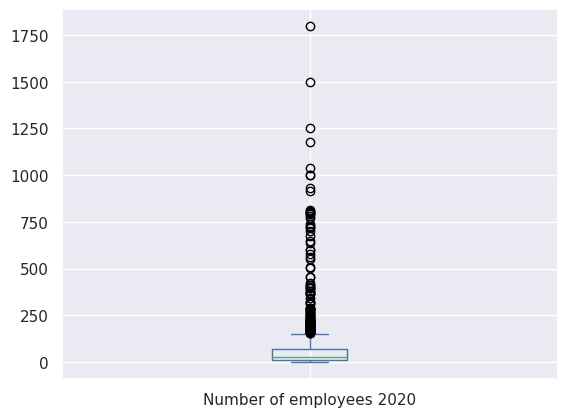

In [67]:
df['Number of employees 2020'].plot(kind = 'box')

Quan sát thấy phân bố của cột `Number of employees 2020` bị skew quá lớn, do đó nhóm quyết định sử dụng giá trị trung vị của cột này để điền vào các giá trị khuyết

In [68]:
df['Number of employees 2020'].fillna(df['Number of employees 2020'].median(), inplace = True)

Với trường hợp của cột `Number of employees 2020`, ta thấy cột này có cả kiểu dữ liệu str, trước khi tiến hành xử lí các missing value, ta sẽ đi tìm hiểu các dòng chứa str trong cột này

In [69]:
df[[isinstance(value, str) for value in df['Number of employees 2017']]]['Number of employees 2017']

Series([], Name: Number of employees 2017, dtype: int64)

In [70]:
(df['Number of employees 2017'] == 'na').sum()

0

Cột này ngoài chứa các giá trị số ở dạng str còn chứa str `'na'`, ta thay các giá trị này bằng `np.nan`

In [71]:
df.replace('na', np.nan, inplace = True)

In [72]:
df['Number of employees 2017'] = df['Number of employees 2017'].astype(float)
df['Number of employees 2017'].fillna(df['Number of employees 2017'].median(), inplace = True)

In [73]:
df.isnull().sum()

Rank                                    0
Name                                    0
in 2021 ranking                         0
in 2020 ranking                         0
Country                                 0
Sector                                  0
Absolute Growth Rate %                  0
Compound Annual Growth Rate (CAGR) %    0
Revenue 2020 (€)                        0
Revenue 2017 (€)                        0
Number of employees 2020                0
Number of employees 2017                0
Founding Year                           0
dtype: int64

Sau khi đã xử lí hết các missing value, ta chuyển đổi kiểu dữ liệu của các cột cho phù hợp

In [74]:
df.iloc[:, [0, 8, 9, 10, 11, 12]] = df.iloc[:, [0, 8, 9, 10, 11, 12]].astype(int)

## 2.4. Duplicated rows
Kiểm tra xem dữ liệu có dòng nào bị trùng hay không

In [75]:
df.duplicated().sum()

0

Ngoài việc kiểm tra từng dòng trên tất cả các cột, ta còn cần kiểm tra giá trị lặp trên cột `Rank` và `Name` vì 2 cột này được xem như key value, mỗi `Rank` phải nằm trong khoảng từ 1 tơi 1000 và không được trùng nhau, mỗi công ty chỉ được xếp hạng đúng một lần

In [76]:
df['Rank'].duplicated().sum()

0

In [77]:
((df['Rank'] <= 1000) & (df['Rank'] >= 1)).sum()

1000

In [78]:
df['Name'].duplicated().sum()

0

## 2.5. Outliers
Ở phần này nhóm tiến hành kiểm tra outliers ở các cốt. Cột `Rank` và `Name` là key value, do đó không kiểm tra outliers trên các cột này

### 2.5.1. Các cột categorical

In [79]:
df['in 2020 ranking'].value_counts()

No     852
Yes    148
Name: in 2020 ranking, dtype: int64

In [80]:
df['in 2021 ranking'].value_counts()

No     694
Yes    306
Name: in 2021 ranking, dtype: int64

In [81]:
df['Country'].value_counts()

Italy              235
Germany            194
UK                 155
France             147
Spain               49
Poland              34
Sweden              28
The Netherlands     19
Hungary             13
Czech Republic      11
Lithuania           11
Finland             11
Norway              11
Belgium             10
Romania              8
Bulgaria             7
Portugal             7
Slovakia             7
Croatia              7
Denmark              6
Greece               5
Austria              5
Ireland              4
Switzerland          4
Estonia              4
Cyprus               3
Slovenia             2
Latvia               1
Luxembourg           1
Liechtenstein        1
Name: Country, dtype: int64

Có tới 30 quốc gia có công ty tham gia xếp hạng nhưng chủ yếu chỉ tập trung ở top 5, 6 quốc gia đầu tiên, phần lớn còn lại nằm ở mức dưới 10 công ty một quốc gia. Nhiều quốc gia chỉ có từ 1 tới 2 công ty tham gia. Sau khi bàn bạc, nhóm quyết định gom nhóm các quốc gia có từ 5 công ty trở xuống vào một nhóm, gọi là `Other` và lưu vào cột `Country1`

In [82]:
other_country = df['Country'].value_counts()[df['Country'].value_counts() <= 5].index
df['Country1'] = df['Country']
df['Country1'].replace(other_country, 'Other', inplace = True)

In [83]:
df['Sector'].value_counts()
(df.iloc[:, 13:].isnull().sum() == 1001).sum()

0

Có 39 lĩnh vực các công ty tham gia xếp hạng hoạt động, quá nửa trong số đó có từ 10 công ty tham gia hoạt động so với top 1 tới 209 công ty. Dù vậy sau khi bàn bạc, nhóm quyết định gom nhóm các lĩnh vực có từ 7 công ty trở xuống và gom vào nhóm `Other`, lưu vào cột `Sector1`

In [84]:
other_country = df['Sector'].value_counts()[df['Sector'].value_counts() <= 5].index
df['Sector1'] = df['Sector']
df['Sector1'].replace(other_country, 'Other', inplace = True)

### 2.5.2. Các cột numerical


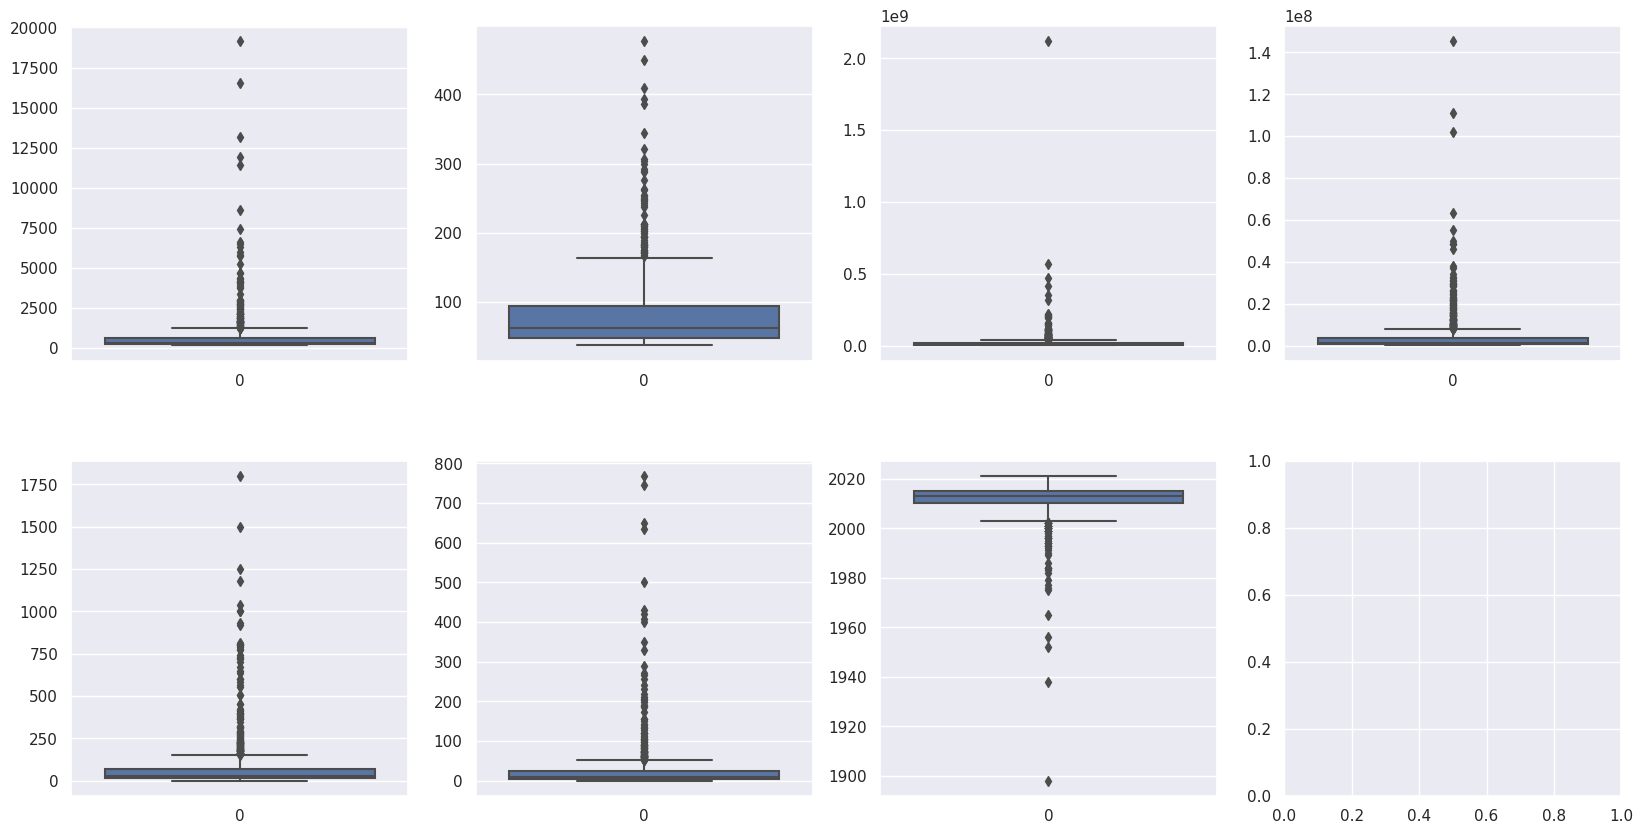

In [85]:
numerical_columns = df.keys()[6:]

fig, axes = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 10))
fig.subplots_adjust(hspace = 0.3)

for i, ax in enumerate(axes.flatten()[:7]):
    sns.boxplot(df[numerical_columns[i]], ax = ax)

Tuy ở các cột đều xuất hiện outliers nhưng theo `Financial Times`, các outliers này đều đã được kiểm tra và đánh giá bởi `Statista`, do đó nhóm cũng sẽ không can thiệp vào các outliers này 

## 2.6. Xóa cột Absolute Growth Rate %
Ở đây nhóm nhận thấy cách tính và ý nghĩa của Absolute Growth Rate và Compound Annual Growth Rate khá tương tự, tuy nhiên Compound Annual Growth Rate cho biết tốc độ tăng trưởng trung bình theo năm, có nhiều ý nghĩa hơn, do đó ta chỉ cần giữ lại cột này và xóa cột Absolute Growth Rate

In [86]:
df.drop(columns = ['Absolute Growth Rate %'], inplace = True)

## 2.7. Đổi tên một số cột
Để thuận tiện cho việc truy xuất dữ liệu về sau, nhóm tiến hành đổi tên một số cột như sau:
- in 2021 ranking -> Ranked2021
- in 2020 ranking -> Ranked2020
- Compound Annual Growth Rate (CAGR) % -> CAGR
- Revenue 2020 (€) -> Revenue2020
- Revenue 2017 (€) -> Revenue2017
- Number of employees 2020 -> Employees2020
- Number of employees 2017 -> Employees2017
- Founding Year -> FoundingYear

In [87]:
df = df.rename(columns = {
    'in 2021 ranking': 'Ranked2021',
    'in 2020 ranking': 'Ranked2020',
    'Number of employees 2020': 'Employees2020',
    'Number of employees 2017': 'Employees2017',
    'Revenue 2020 (€)': 'Revenue2020',
    'Revenue 2017 (€)': 'Revenue2017',
    'Compound Annual Growth Rate (CAGR) %': 'CAGR',
    'Founding Year': 'FoundingYear'
})

### 2.8. Sửa cột FoundingYear
Khi đang khảo sát mối quan hệ giữa cột FoundingYear và CAGR, nhóm phát hiện có một công ty được ghi nhận thành lập năm 2021

In [88]:
df[df['FoundingYear'] == 2021]

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Country1,Sector1
990,991,Meblobranie.pl,Yes,Yes,Poland,Ecommerce,36.71,19295429,6909799,25,12,2021,Poland,Ecommerce


Sau khi tra cứu từ Google, nhóm ghi nhận công ty Meblobranie.pl được thành lập năm 2011, có thể đây là do lỗi typo

In [89]:
df.loc[990, 'FoundingYear'] = 2011

In [90]:
df.to_csv('data/FT1000_v1.csv', index = False)